# 00_Installation



In [ ]:
!git clone https://github.com/Mufabo/robustsp.git
%cd robustsp
!pip3 install -e .

# 01 Location and Scale


## Sensitivity Curve Location

/content/robustsp/robustsp/AuxiliaryFunctions/whub.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wx = 1.*(absx<=cl) + (cl*(1./absx))*(absx>cl)
/content/robustsp/robustsp/AuxiliaryFunctions/whub.py:8: RuntimeWarning: invalid value encountered in multiply
  wx = 1.*(absx<=cl) + (cl*(1./absx))*(absx>cl)


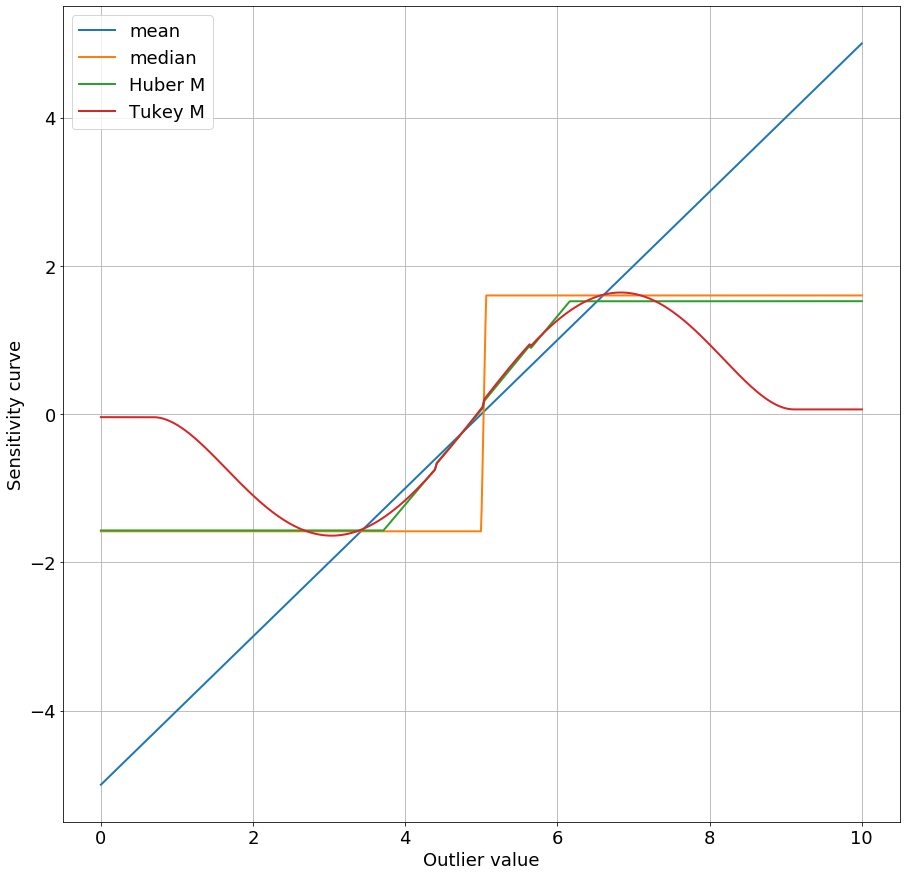

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import robustsp as rsp

matplotlib.rcParams['figure.figsize'] = [15,15]

#fix seed of random number generator for reproducibility
random.seed(2)

# Number of measurements
N = 100

# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5

# outlier values
delta_x = np.linspace(0,10,1000)

# sensitivity curve for mean
SC_mean = np.zeros(delta_x.shape)
mu_hat = np.mean(x_N_minus1)
for ii in range(len(delta_x)):
    SC_mean[ii] = N*(np.mean(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)

# sensitivity curve for median
SC_med = np.zeros(delta_x.shape)
mu_hat = np.median(x_N_minus1)
for ii in range(len(delta_x)):
    SC_med[ii] = N*(np.median(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)

# sensitivity curve for Huber's location estimator
c = 1.3415
SC_hub = np.zeros(delta_x.shape)
mu_hat = rsp.MLocHUB(x_N_minus1,c)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(rsp.MLocHUB(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)

# sensitivity curve for Tukey's location estimator
c = 4.68
SC_tuk = np.zeros(delta_x.shape)
mu_hat = rsp.MLocTUK(x_N_minus1,c)
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(rsp.MLocTUK(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)
    
plt.rcParams.update({'font.size': 18})

plt.plot(delta_x,SC_mean-np.mean(SC_mean), label ='mean', linewidth=2.0)
plt.plot(delta_x,SC_med-np.mean(SC_med), label='median', linewidth=2)
plt.plot(delta_x,SC_hub-np.mean(SC_hub), label='Huber M', linewidth=2)
plt.plot(delta_x,SC_tuk-np.mean(SC_tuk), label ='Tukey M', linewidth=2)

plt.grid(True)

plt.xlabel('Outlier value')
plt.ylabel('Sensitivity curve')
plt.legend()

plt.show()

## Sensitivity Curve

/content/robustsp/robustsp/AuxiliaryFunctions/whub.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wx = 1.*(absx<=cl) + (cl*(1./absx))*(absx>cl)
/content/robustsp/robustsp/AuxiliaryFunctions/whub.py:8: RuntimeWarning: invalid value encountered in multiply
  wx = 1.*(absx<=cl) + (cl*(1./absx))*(absx>cl)


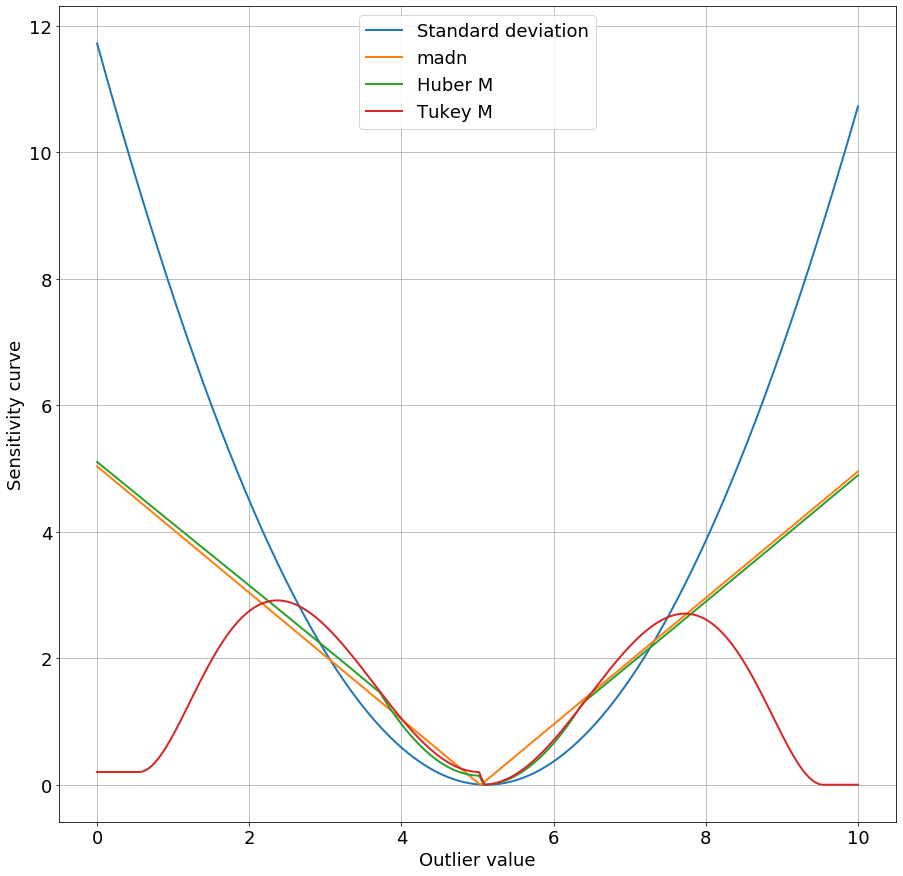

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from robustsp.LocationScale.MscaleTUK import *
from robustsp.LocationScale.MscaleHUB import *
from robustsp.AuxiliaryFunctions.madn import madn

matplotlib.rcParams['figure.figsize'] = [15,15]

# fix seed of random number generator for reproducibility
random.seed(2)

# Number of measurements
N = 100

# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5

# outlier values
delta_x = np.linspace(0,10,1000)

# sensitivity curve for standard deviation
SC_std = np.zeros(delta_x.shape)
std_hat = np.std(x_N_minus1, ddof=1) # 1.0551

for ii in range(len(delta_x)):
    SC_std[ii] = N*(np.std(np.append(x_N_minus1,delta_x[ii]), ddof=1) 
                     - std_hat)
    
# sensitivity curve for median absolute deviation
# that does not coverge to IF
SC_mad = np.zeros(delta_x.shape)
std_hat = madn(x_N_minus1) # 0.8319

for ii in range(len(delta_x)):
    SC_mad[ii] = N*(madn(np.append(x_N_minus1,delta_x[ii])) 
                     - std_hat) 
    
# Sensitivity Curve for mean absolute deviation
# around the median
SC_mead = np.zeros(delta_x.shape)
std_hat = np.mean(np.abs(x_N_minus1-np.median(x_N_minus1))) # 0.7859

for ii in range(len(delta_x)):
    SC_mead[ii] = N*(np.mean(np.abs(np.append(x_N_minus1, delta_x[ii])
                                         -np.median(x_N_minus1)))
                     -std_hat)
    
# Sensitivity Curve for Huber's scale estimate
c =  1.3415 
SC_hub = np.zeros(len(delta_x))
std_hat = MscaleHUB(x_N_minus1)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(MscaleHUB(np.append(x_N_minus1, delta_x[ii]))
                    -std_hat)
    
# Sensitivity Curve for Tukey's scale estimate
c = 4.68 
SC_tuk = np.zeros(delta_x.shape)
std_hat = MscaleTUK(x_N_minus1)

for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(MscaleTUK(np.append(x_N_minus1, delta_x[ii]))-std_hat)
    
plt.rcParams.update({'font.size': 18})

plt.plot(delta_x,SC_std-np.amin(SC_std), label ='Standard deviation', linewidth=2)
plt.plot(delta_x,SC_mead-np.amin(SC_mead), label='madn', linewidth=2)
plt.plot(delta_x,SC_hub-np.amin(SC_hub), label='Huber M', linewidth=2)
plt.plot(delta_x,SC_tuk-np.amin(SC_tuk), label ='Tukey M', linewidth=2)

plt.grid(True)

plt.xlabel('Outlier value')
plt.ylabel('Sensitivity curve')
plt.legend()

plt.show()

# 02 Regression


## Image example

rankflasso: starting iterations

rankflasso: starting iterations



(-18.950000000000003, 419.95, -0.15000000000000002, 3.15)

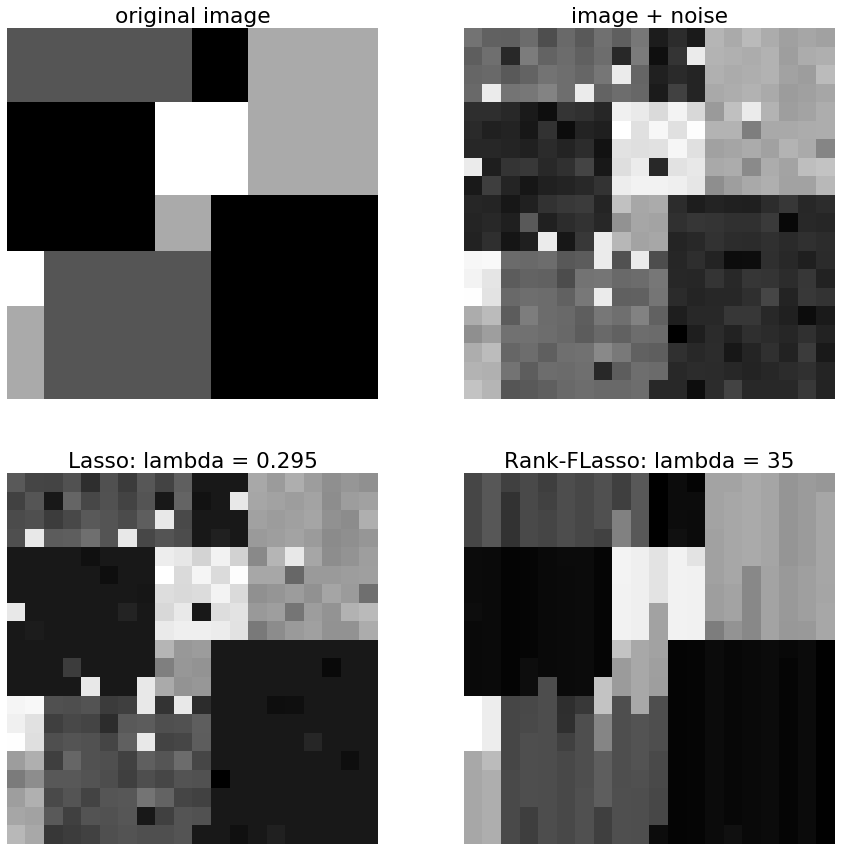

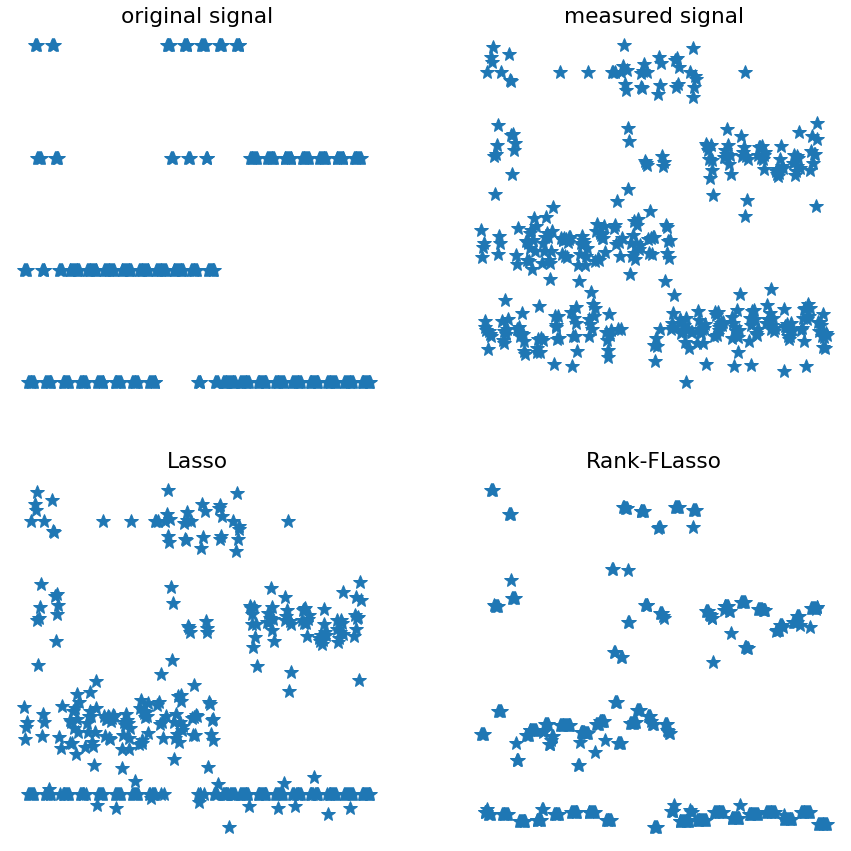

In [ ]:
import robustsp as rsp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

matplotlib.rcParams['figure.figsize'] = [15,15]

# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat') 
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
scaledata1 = lambda x: 3*(x-np.min(x)) / (np.max(x) - np.min(x))
scaledata2 = lambda x: 3*(x-np.min(x,axis=1)[:,None]) / (np.max(x,axis=1) - np.min(x,axis=1))[:,None]

# Plot the image
fig0 = plt.figure(0)

plt.subplot(2,2,1)
plt.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('original image')
plt.axis('off')

# Plot the image + noise
plt.subplot(2,2,2)
plt.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('image + noise')
plt.axis('off')

# Plot the signal
fig1 = plt.figure(1)
plt.subplot(2,2,1)
plt.plot(range(1,n+1), y20,'*',ms=14)
plt.title('original signal')
plt.axis('off')

# Plot the noisy (measured) signal
plt.subplot(2,2,2)
plt.plot(range(1,n+1), scaledata1(y20n),'*',ms=14)
plt.title('measured signal')
plt.axis('off')
# --- Compute the LASSO solution ---

L = 20 # Grid size
Blas20n, stats = rsp.enetpath(y20n, np.eye(n), 1, L,10**-3,False)
Blas20n = Blas20n[:,1:] # Get rid of the all-zeros first column 

# Choose the best LASSO solution
ero = scaledata2(Blas20n.T).T - y20
MSElasso = np.min(np.sum(ero**2,axis=0))
indx = np.argmin(np.sum(ero**2,axis=0)) # should b 6
Blas = Blas20n[:,indx] # the best lasso solution
lam_las = stats['Lambda'][indx+1] # the best lambda value


plt.figure(0)
plt.subplot(2,2,3)
plt.imshow(np.reshape(Blas, (20, 20), order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('Lasso: lambda = %.3f' % lam_las)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,3)
plt.plot(range(1,n+1), scaledata1(Blas),'*',ms=14)
plt.title('Lasso')
plt.axis('off')
# --- Compute the Rank-FLasso solution ---

# start with some initial values of lambda1 and lambda2
lambda2 = 340
lambda1 = 124

B1 = rsp.rankflasso(y20n,np.eye(n),lambda1,lambda2,Blas,1)[0]
MSE_rank1 = np.sum((scaledata1(B1)-y20n)**2)

# adjust the parameters
lambda2 = 420
lambda1 = 35

B2 = rsp.rankflasso(y20n.flatten(), np.eye(400),lambda1,lambda2,B1,1)[0]
MSE_rank2 = np.sum((scaledata1(B2)-y20n)**2)

plt.figure(0)
plt.subplot(2,2,4)
plt.imshow(np.reshape(B2, (20, 20), order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('Rank-FLasso: lambda = %i' % lambda1)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,4)
plt.plot(range(1,n+1), scaledata1(B2),'*',ms=14)
plt.title('Rank-FLasso')
plt.axis('off')

## Prostata Analysis


/content/robustsp/robustsp/Regression/ladlasso.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  crit = np.linalg.norm(b1-b0)/np.linalg.norm(b0);
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


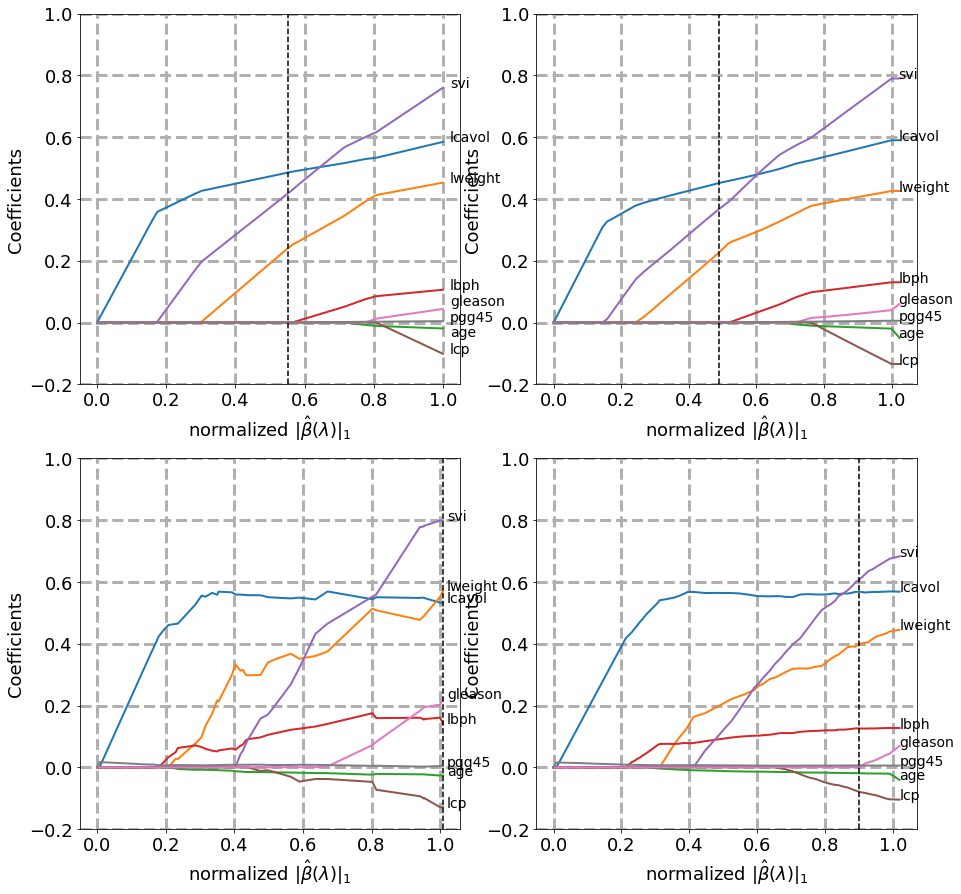

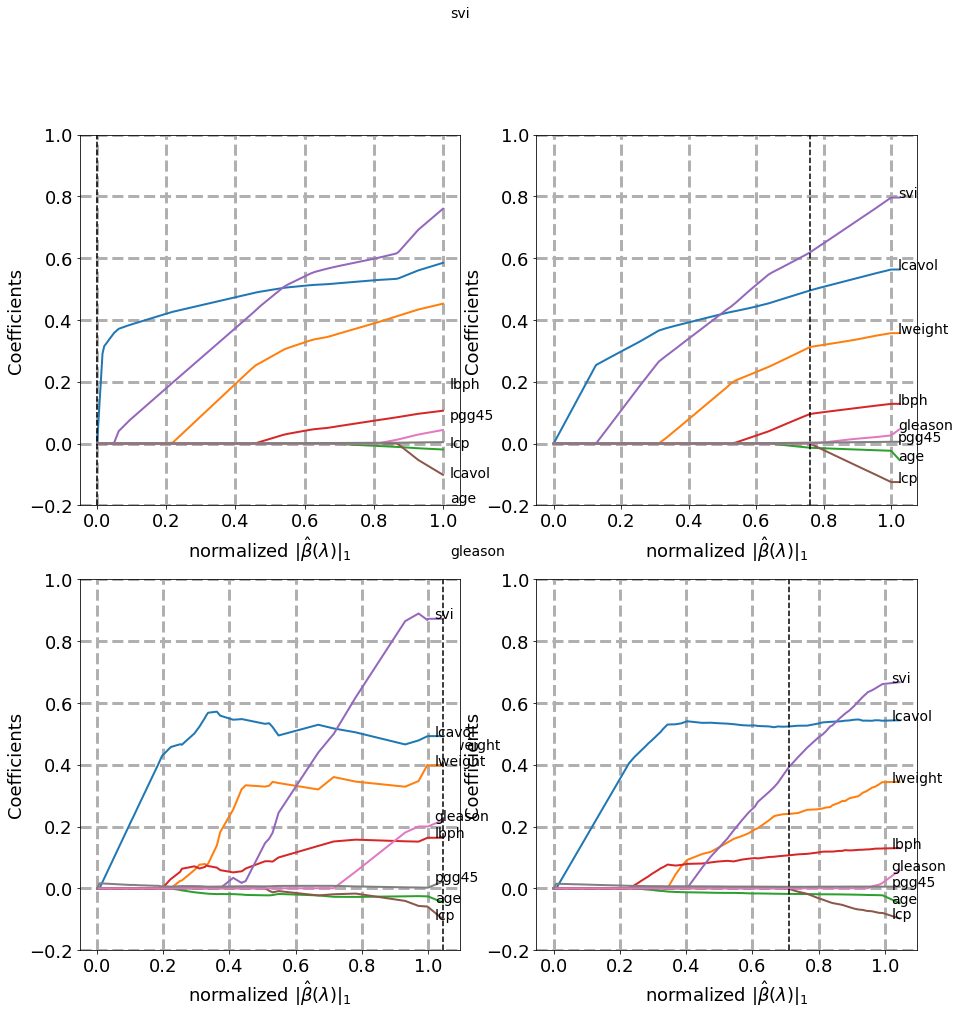

In [ ]:
import robustsp as rsp
import numpy as np
import matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

path = pkg_resources.resource_filename('robustsp', 'data/prostate.mat')
names = scipy.io.loadmat(path,struct_as_record=False)['names'][0]
names = [i for i in zip(*names)][0]

X = scipy.io.loadmat(path,struct_as_record=False)['X']
y = scipy.io.loadmat(path,struct_as_record=False)['y']
n,p = X.shape

#############   LASSO   ############

B,stats = rsp.enetpath(y,X,1)

k = np.nanargmin(stats['BIC']) # ,29 , 30 in matlab
blas = np.copy(B[:,k]) # LASSO BIC solution 
bmaxlas = np.sum(np.abs(B[1:,-1])) # largest value of || \beta ||_1, 2.0733

# plot LASSO

locs = np.copy(B[1:,-1])
locs[2] = locs[2] - 0.025 # 'age' is too close, so put it down
locs[6] = locs[6] + 0.01
loc_x = np.sum(np.abs(blas[1:-1])) / bmaxlas
xx = np.sum(np.abs(B[1:,:]),axis=0)/bmaxlas # slightly different from Matlab version
Y = B[1:,:]
fig1 = plt.figure(0)
plt.subplot(221)
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

###############   LAD-LASSO   ################

Blad,statslad = rsp.ladlassopath(y,X,reltol=1e-7)
ladind = np.nanargmin(statslad['gBIC'])
blad = Blad[:,ladind] # LAD-Lasso BIC solution
bmaxlad = np.max(np.sum(np.abs(Blad[1:,:]),axis=0)) # largest solution || \beta ||_1

# Plot LAD-LASSO
plt.subplot(223)
locs = Blad[1:,-1] # stellenweise andars als matlab 
locs[1] = locs[1] + 0.02 # lweight up
locs[6] = locs[6] + 0.02 # gleason up
locs[3] = locs[3] - 0.02 # age down
loc_x = np.sum(np.abs(blad[1:])) / bmaxlad
xx = np.sum(np.abs(Blad[1:,:]),axis=0)/bmaxlad 
Y = Blad[1:,:]
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

############   Rank-LASSO   ############

Brlad, _, statsrlad = rsp.ranklassopath(y,X)
rladind = np.nanargmin(statsrlad['gBIC'])
brlad = Brlad[:,rladind]
bmaxrlad = np.max(np.sum(np.abs(Brlad),axis=0))

# Plot Rank-LASSO
plt.subplot(224)
locs = Brlad[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.02 # age down
loc_x = np.sum(np.abs(brlad)) / bmaxrlad
xx = np.sum(np.abs(Brlad),axis=0)/bmaxrlad 
rsp.prostate_plot_setup(xx,Brlad,locs,loc_x,names)
fig1.show()

############   M-LASSO   ############

Bhub, _,statshub = rsp.hublassopath(y,X)
hubind = np.nanargmin(statshub['gBIC'])
bhub = Bhub[:,hubind]
bmaxhub = np.max(np.sum(np.abs(Bhub),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub)) / bmaxhub
xx = np.sum(np.abs(Bhub),axis=0)/bmaxhub 
rsp.prostate_plot_setup(xx,Bhub,locs,loc_x,names)
fig1.show()

# Outlier

yout = np.copy(y)
yout[0] = 55
fig2 = plt.figure(1)

#############   LASSO   ############

Bout,stats2 = rsp.enetpath(yout,X,1)
k = np.nanargmin(stats2['BIC']) 
blas_out = np.copy(Bout[:,k]) # LASSO BIC solution 
bmaxlas_out = np.sum(np.abs(Bout[1:,-1])) # largest value of || \beta ||_1

# plot LASSO

locs = np.copy(Bout[1:,-1])
locs[0] = locs[0] - 0.04
locs[2] = locs[2] - 0.08
locs[3] = locs[3] + 0.06
locs[5] = locs[5] + 0.02
locs[7] = locs[7] + 0.07
loc_x = np.sum(np.abs(blas_out[1:-1])) / bmaxlas_out
xx = np.sum(np.abs(Bout[1:,:]),axis=0)/bmaxlas_out # slightly different from Matlab version
Y = B[1:,:]
plt.subplot(221)
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig2.show()

###############   LAD-LASSO   ################

Blad2,statslad2 = rsp.ladlassopath(yout,X,reltol=1e-7)
ladind2 = np.nanargmin(statslad['gBIC'])
blad2 = Blad2[:,ladind2] # LAD-Lasso BIC solution
bmaxlad2 = np.max(np.sum(np.abs(Blad2[1:,:]),axis=0)) # largest solution || \beta ||_1

# Plot LAD-LASSO
plt.subplot(223)
locs = Blad2[1:,-1] # stellenweise andars als matlab 
locs[5] -= 0.04
locs[7] += 0.02
locs[6] += 0.02
locs[2] -= 0.02
loc_x = np.sum(np.abs(blad2[1:])) / bmaxlad2
xx = np.sum(np.abs(Blad2[1:,:]),axis=0)/bmaxlad2 
Y = Blad2[1:,:]
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig2.show()

############   Rank-LASSO   ############

Brlad2, _, statsrlad2 = rsp.ranklassopath(yout,X)
rladind2 = np.nanargmin(statsrlad2['gBIC'])
brlad2 = Brlad2[:,rladind2]
bmaxrlad2 = np.max(np.sum(np.abs(Brlad2),axis=0))
 
# Plot Rank-LASSO
plt.subplot(224)
locs = Brlad2[:,-1] 
locs[6] = locs[6] + 0.04 # gleason up
locs[2] = locs[2] - 0.025 # age down
locs[5] -= 0.015
loc_x = np.sum(np.abs(brlad2)) / bmaxrlad2
xx = np.sum(np.abs(Brlad2),axis=0)/bmaxrlad2 
rsp.prostate_plot_setup(xx,Brlad2,locs,loc_x,names)
fig2.show()

############   M-LASSO   ############

Bhub2, _,statshub2 = rsp.hublassopath(yout,X)
hubind2 = np.nanargmin(statshub2['gBIC'])
bhub2 = Bhub2[:,hubind2]
bmaxhub2 = np.max(np.sum(np.abs(Bhub2),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub2[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub2)) / bmaxhub2
xx = np.sum(np.abs(Bhub2),axis=0)/bmaxhub2 
rsp.prostate_plot_setup(xx,Bhub2,locs,loc_x,names)
fig2.show()

# 03 Covariance Matrix estimation

## Radar detection

takes a few minutes 

10000 / 10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.52, 0.05, '0.1%')

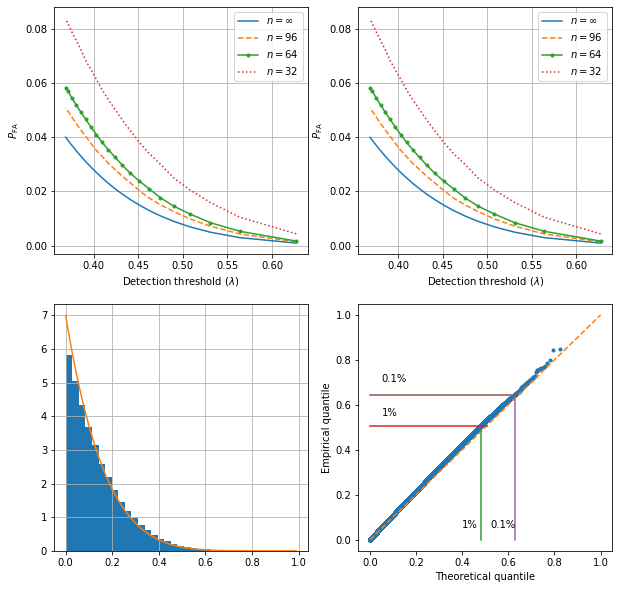

In [ ]:
import numpy as np
import robustsp as rsp
import scipy
from scipy.stats.distributions import chi2
from scipy.io import loadmat
from IPython.display import clear_output
import matplotlib.pyplot as plt

NR_ITER = 10000
p = 8 # dimension

# Matlab-like exp function for complex numbers
mExp = lambda c: np.exp(np.real(c))*\
        (np.cos(np.imag(c))\
         +1j*np.sin(np.imag(c)))

s = np.array([mExp(x) for x in 1j*np.arange(1,p+1)*np.pi]) # pulse of || p ||^2 = m

alpha = np.append(np.arange(0.001,0.04,0.002),0.04)
lam = 1 - alpha ** (1/(p-1)) # 1x21
nu = 0.5
nlist = [4*p,8*p,12*p] # number of secondary data
ntest = 10 # number of primary data

Pfa1 = np.zeros((len(nlist),len(alpha))) # 3 x 21
Pfa2 = np.zeros((len(nlist),len(alpha)))

Lambda1 = np.zeros((NR_ITER,ntest)) # 10_000 x 10
Lambda2 = np.zeros((NR_ITER,ntest))

np.random.seed(1) # for reproducibility

####################

for kk in range(len(nlist)):
    

    n = nlist[kk]

    for it in range(NR_ITER):
        # Generate Covariance matrix
        l = np.random.uniform(0.1,1,p) 

        # samples p number uniformly from [0.1,1[
        P = np.linalg.qr(np.random.rand(p,p)+
                    np.random.rand(p,p)*1j)[0] # the Q-matrix from QR decomposition
        # P is 8 x 8

        sig = p*P@np.diag(l/np.sum(l,axis=0))@P.conj().T # 8 x 8
        sig.ravel()[np.arange(0,p**2,p+1)] = \
                        np.real(sig.ravel()[np.arange(0,p**2,p+1)]) 
        sqrsig = scipy.linalg.sqrtm(sig) # 8 x 8

        # Generate the secondary data and compute the covariance
        x0 = sqrsig*np.sqrt(0.5)@(np.random.randn(p,n)+
                              1j*np.random.randn(p,n)) # ~ N_p(0,I)
        # 8 x 32
        x = np.sqrt(np.random.gamma(nu,1/nu,n)) * x0 # 8 x 32

        hsig1,_,_,_ = rsp.Mscat(x.conj().T,'t-loss',0) # Tylers M-estimator, 8x8
        hsig2,_,_,_ = rsp.Mscat(x.conj().T,'Huber',0.8) # Hubers M-estimator, 8x8

        B1 = scipy.linalg.sqrtm(np.linalg.pinv(hsig1)) #8x8
        B2 = scipy.linalg.sqrtm(np.linalg.pinv(hsig2)) #8x8

        # Generate primary data from C K_v(0,sig)
        z0 = sqrsig * np.sqrt(0.5)@(np.random.randn(p,ntest)+
                                1j*np.random.randn(p,ntest)) # 8x10

        z = np.sqrt(np.random.gamma(nu,1/nu,ntest)) * z0 # 8x10


        # Compute the ADAPTIVE DETECTOR
        v1 = B1@z # 8x10
        q1 = B1@s[:,None] / scipy.linalg.norm(B1@s[:,None]) # 8x1

        v2 = B2@z
        q2 = B2@s[:,None] / scipy.linalg.norm(B2@s[:,None])

        v1 /= np.sqrt(np.sum(v1*np.conj(v1),axis=0))
        v2 /= np.sqrt(np.sum(v2*np.conj(v2),axis=0))

        Lambda1[it,:] = np.abs((v1.conj().T@q1).ravel())**2 
        Lambda2[it,:] = np.abs((v2.conj().T@q2).ravel())**2       
        if (it+1)%250==0:
          clear_output()
          print(it+1,'/',NR_ITER)
    for al in range(len(alpha)):
        Pfa1[kk,al] = np.sum(Lambda1[:]>lam[al])/(NR_ITER*ntest)
        Pfa2[kk,al] = np.sum(Lambda2[:]>lam[al])/(NR_ITER*ntest)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,10]

from scipy.stats import beta

# Plot  Threshold  vs PFA
plt.subplot(2,2,1)
plt.plot(lam,alpha,label='$n=\infty$')
plt.plot(lam,Pfa1[2,:],'--',label='$n=96$')
plt.plot(lam,Pfa1[1,:],'.-',label='$n=64$')
plt.plot(lam,Pfa1[0,:],':',label='$n=32$')
plt.grid()
plt.xlabel('Detection threshold $(\lambda)$')
plt.ylabel('$P_{\mathrm{FA}}$')
plt.legend()

plt.subplot(2,2,2)
plt.plot(lam,alpha,label='$n=\infty$')
plt.plot(lam,Pfa1[2,:],'--',label='$n=96$')
plt.plot(lam,Pfa1[1,:],'.-',label='$n=64$')
plt.plot(lam,Pfa1[0,:],':',label='$n=32$')
plt.grid()
plt.xlabel('Detection threshold $(\lambda)$')
plt.ylabel('$P_{\mathrm{FA}}$')
plt.legend()

# Plot the histogram
plt.subplot(2,2,3)
plt.hist(Lambda1.flat,30,normed=True)
x_val = np.arange(0, 1,.01)
beta_val = beta.pdf(x_val,1,p-1)
plt.plot(x_val,beta_val)
plt.grid()

# Q-Q plot for Tyler's M-estimator for n = 96
lams = np.sort(Lambda1.flat)
leng = len(lams)
pvals = (np.arange(1,leng+1)-0.5)/leng
qvals = beta.ppf(pvals,1,p-1)
q99 = beta.ppf(.99,1,p-1)
q999= beta.ppf(.999,1,p-1)
e99 = lams[leng-1000]
e999= lams[leng-100]

plt.subplot(2,2,4)
plt.plot(qvals,lams,'.')
plt.plot([0,1],[0,1],'--')
plt.ylabel('Empirical quantile')
plt.xlabel('Theoretical quantile')
plt.plot([q99,q99],[0,q99])
plt.plot([0,e99],[e99,e99])
plt.plot([q999,q999],[0,q999])
plt.plot([0,e999],[e999,e999])
plt.text(0.05, 0.55,'1%')
plt.text(0.05, 0.7,'0.1%')
plt.text(0.4, 0.05,'1%')
plt.text(0.52, 0.05,'0.1%')

# 04 Robust Filtering

## EKF ToA Tracking

/content/robustsp/robustsp/RobustFiltering/examples/Auxiliary/eval_track.py:111: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.where(indices>0)[0],800*indices[indices>0],linefmt='y',markerfmt=' ',basefmt=' ')


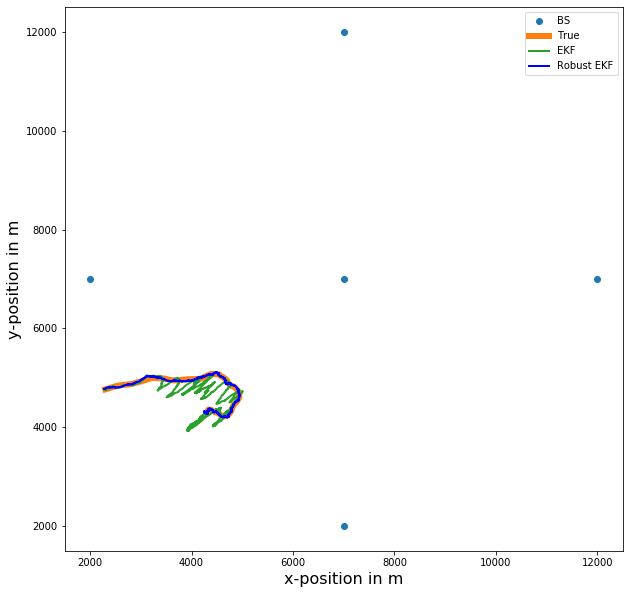

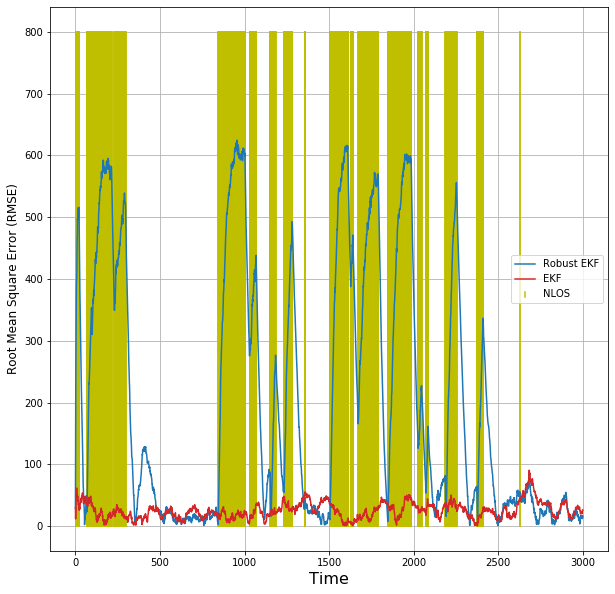

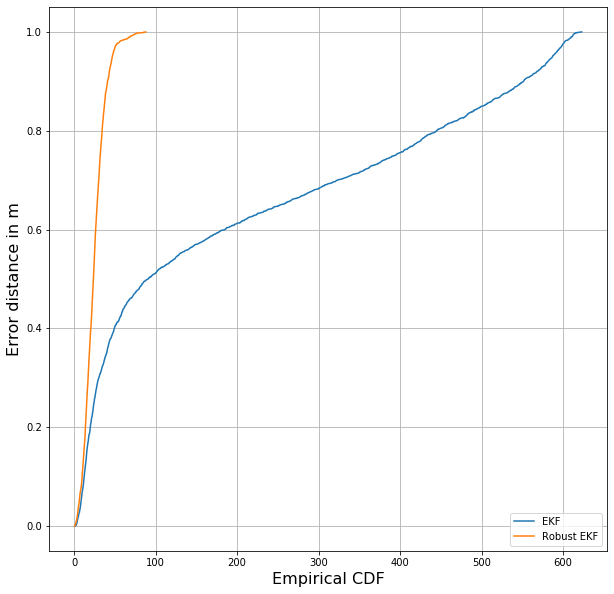

In [ ]:
# Load parameters. The structs generated by set_parameters_book.m are
# loaded as Dictionaries
import scipy.io as sio
import numpy as np
import robustsp as rsp
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *
import matplotlib.pyplot as plt

ekf_th = []
ekf_Hc = []
for ii in range(parameter['mc']):
    parameter['numbermc'] = ii

    # generate measurements
    parameter = create_environment_book(parameter,parameter['start'],parameter['sigma_v'])

    # generate random starting point
    randnvector = parameter['initial_sigma']*np.random.randn(4)
    theta_init  = parameter['start']+ randnvector

    # estimate positions using (robust) extended Kalman filter
    ekf_th.append(rsp.ekf_toa(parameter['MeasuredDistances'],theta_init,parameter['BS'],ekf)[0])
    ekf_Hc.append(rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0])
# Least-squares estimation
ekf_th_x = ekf_th[0][0,:]
ekf_th_y = ekf_th[0][1,:]

# Robust M-estimation
ekf_Hc_x = ekf_Hc[0][0,:]
ekf_Hc_y = ekf_Hc[0][1,:]


fig1 = plt.figure(0)
plt.plot(parameter['BS'][:,0],parameter['BS'][:,1],'o',lw=2, label='BS')
plt.plot(parameter['thx'], parameter['thy'],lw=6,label='True')
plt.plot(ekf_th_x, ekf_th_y, lw=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, lw=2, label='Robust EKF',color='b')
plt.xlabel('x-position in m', size=16)
plt.ylabel('y-position in m', size=16)
plt.legend()

fig2 = plt.figure(1)
fig3 = plt.figure(2)

eval_ekf = rsp.eval_track(ekf_th, parameter, 'r', fig1,fig2,fig3)
eval_ekf_Hc = rsp.eval_track(ekf_Hc, parameter, 'b', fig1,fig2,fig3)
plt.show()

# 05 Dependent Data

## BIP ARMA parameter estimtation

In [ ]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(1) 

### Example 1: AR(1) with 30 percent isolated outliers

#### Generate data

In [ ]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

# Generate outliers
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

#### BIP ARMA MM

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.771


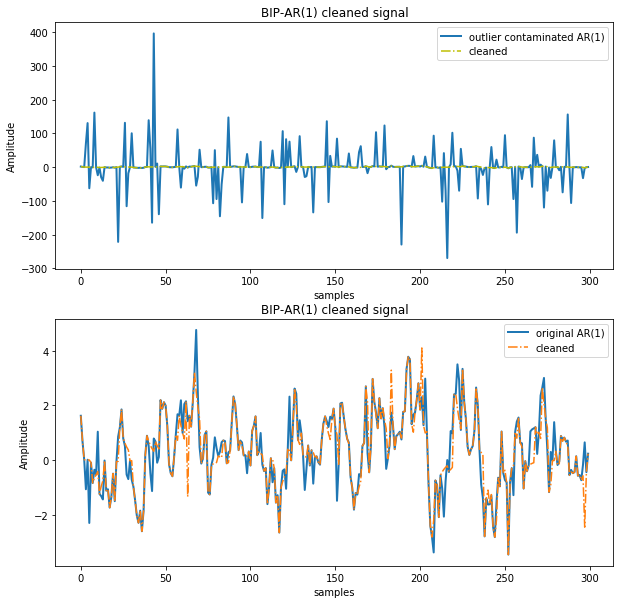

In [ ]:
result = rsp.arma_est_bip_mm(x_ao,p,q)
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA S

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.779


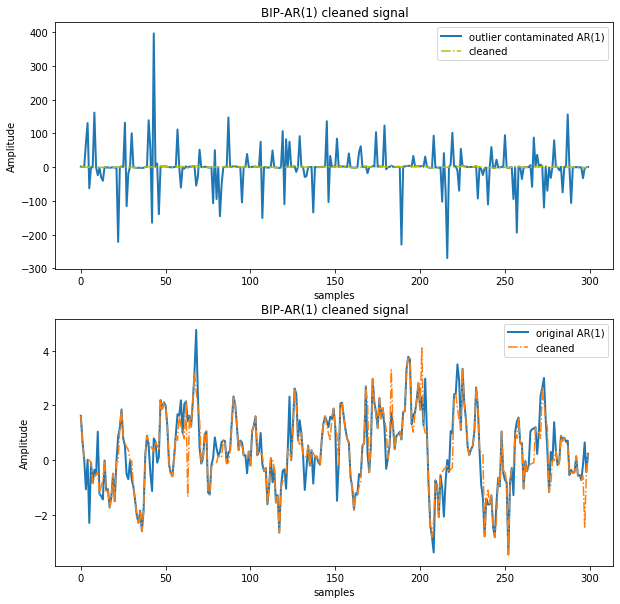

In [ ]:
meth = None
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA Tau

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.680


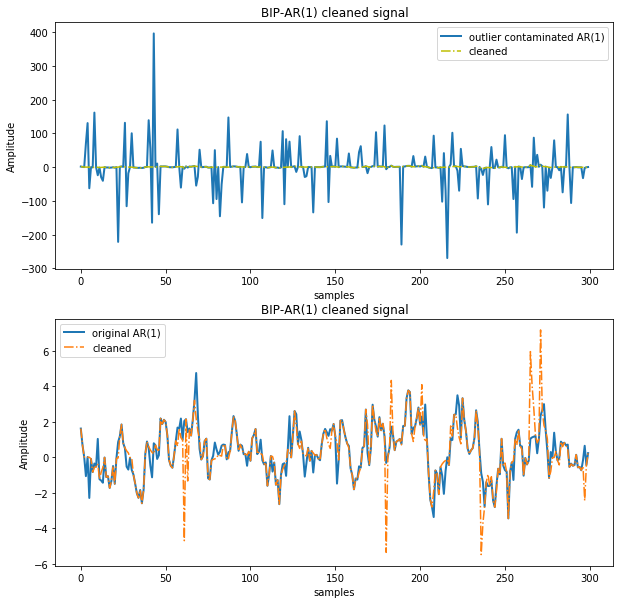

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

### Example 2: ARMA(1,1) with 10% patchy outliers

#### Generate contaminated Data

In [ ]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1
v = 1000*np.random.randn(101)
x_ao = np.array(x)
x_ao[99:200] += v

#### BIP ARMA MM

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.799 

ma_coeff_est = 0.194


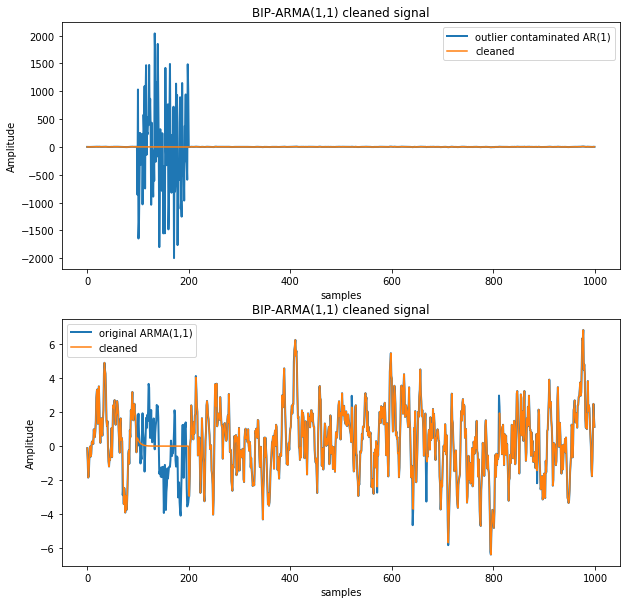

In [ ]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2 \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f''' %(result['ar_coeffs'],result['ma_coeffs']))

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA S

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.849 

ma_coeff_est = 0.034 


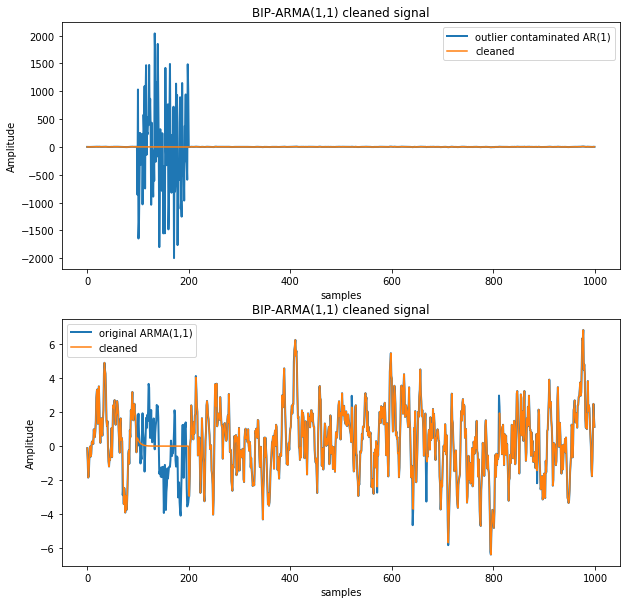

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth='SLSQP')
print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2 \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f ''' %(result['ar_coeffs'],result['ma_coeffs']))
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA Tau

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.817 

ma_coeff_est = 0.128


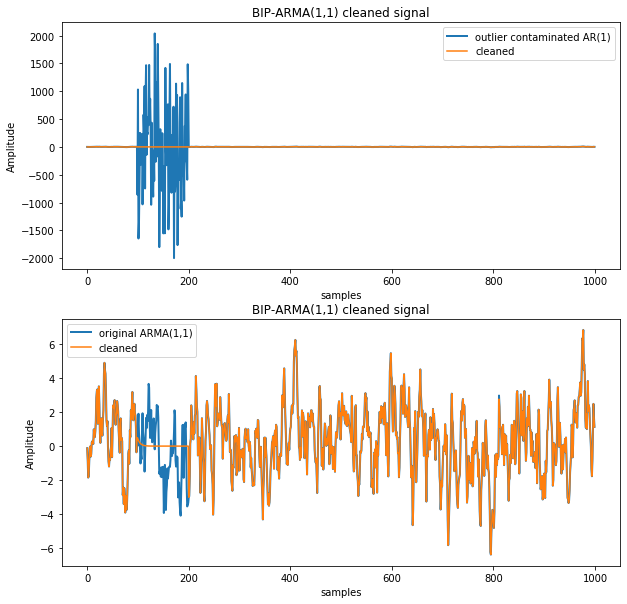

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)

print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2 \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f''' %(result['ar_coeffs'],result['ma_coeffs']))

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

### Example 3: MA(2) with 20 % isolated Outliers

#### Generate data for example 3

In [ ]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

x_ao = x + v

#### BIP ARMA MM

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [-0.66364601  0.4190463 ]


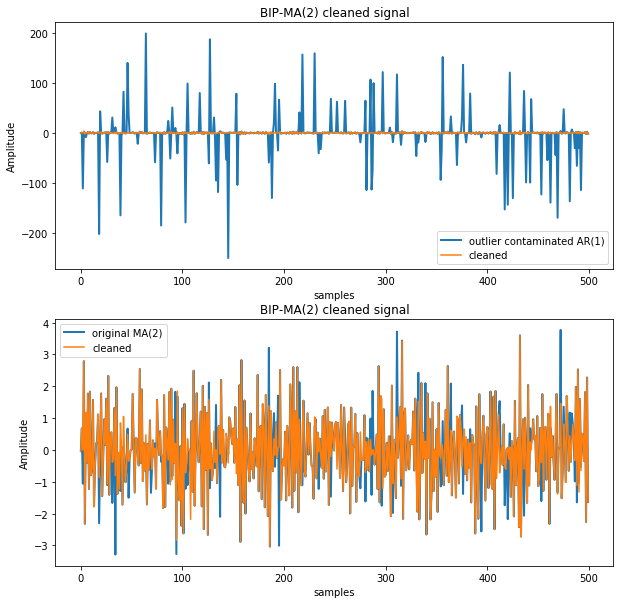

In [ ]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

print('''Example 3: MA(2) ma_coeff [-0.7 0.5] \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA S

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [-0.65593942  0.30490526]


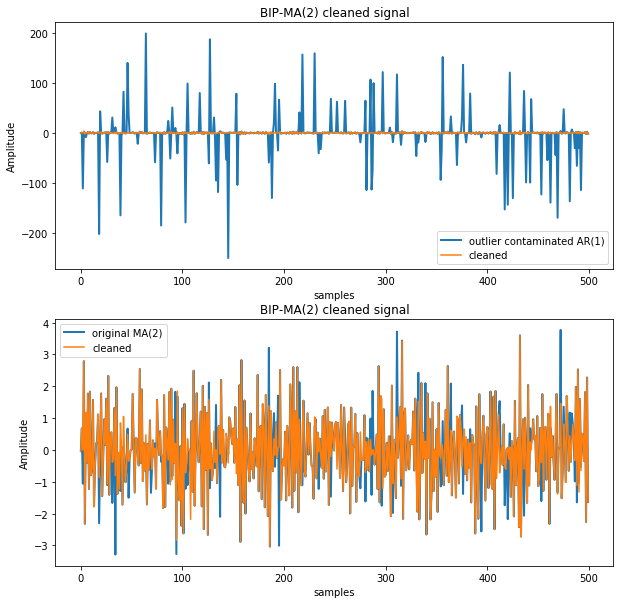

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q)

print('''Example 3: MA(2) ma_coeff [-0.7 0.5] \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

#### BIP ARMA Tau

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [-0.68554825  0.32780644]


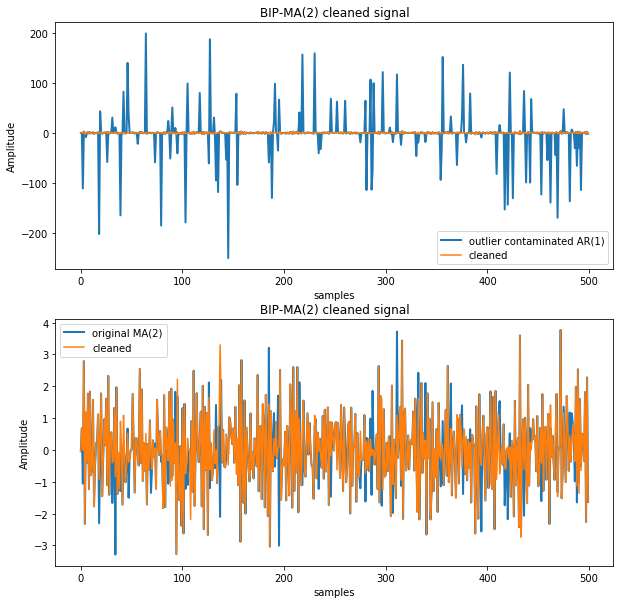

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)

print('''Example 3: MA(2) ma_coeff [-0.7 0.5] \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

## PPG BIP Tau


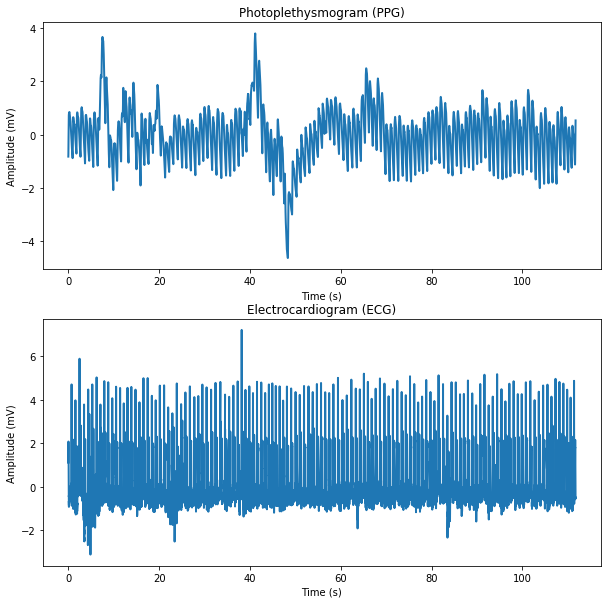

In [ ]:
import pkg_resources
import robustsp as rsp
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
%matplotlib inline
ecg_ppg_datapath = pkg_resources.resource_filename('robustsp', 'data/ECG-PPG_HRV_example.mat')

ppg_data = scipy.io.loadmat(ecg_ppg_datapath)

ecg_data = scipy.io.loadmat(ecg_ppg_datapath)

ppg_signal = ppg_data['ppg_signal'].flatten()

ecg_signal = ecg_data['ecg_signal'].flatten()

ppg_pos = ppg_data['ppg_pos'].flatten()

ecg_pos = ecg_data['ecg_pos'].flatten()

matplotlib.rcParams['figure.figsize'] = [10,10]

t_ppg = np.linspace(0,len(ppg_signal),len(ppg_signal))

t_ecg = np.linspace(0,len(ecg_signal),len(ecg_signal))

plt.subplot(2,1,1)
plt.plot(t_ppg/1000,ppg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(t_ecg/1000,ecg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
a=plt.title('Electrocardiogram (ECG)')

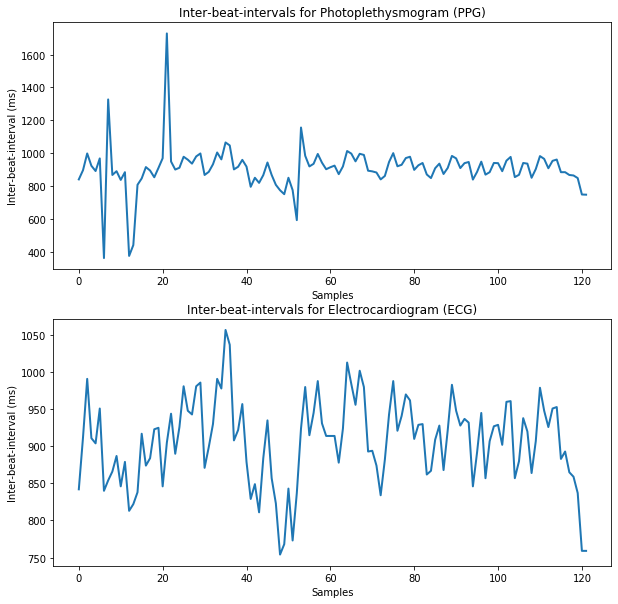

In [ ]:
ibi_ppg = np.diff(ppg_pos)

ibi_ecg = np.diff(ecg_pos)

plt.subplot(2,1,1)
plt.plot(ibi_ppg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Inter-beat-intervals for Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(ibi_ecg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
_=plt.title('Inter-beat-intervals for Electrocardiogram (ECG)')


Selected ARMA model: MA(11)
estimated coefficients: 
 [ 0.64521781  0.09251733  0.20596041  0.43604184  0.08685174 -0.27346122
  0.04146886 -0.00522691 -0.05596702  0.08854838  0.18049251]


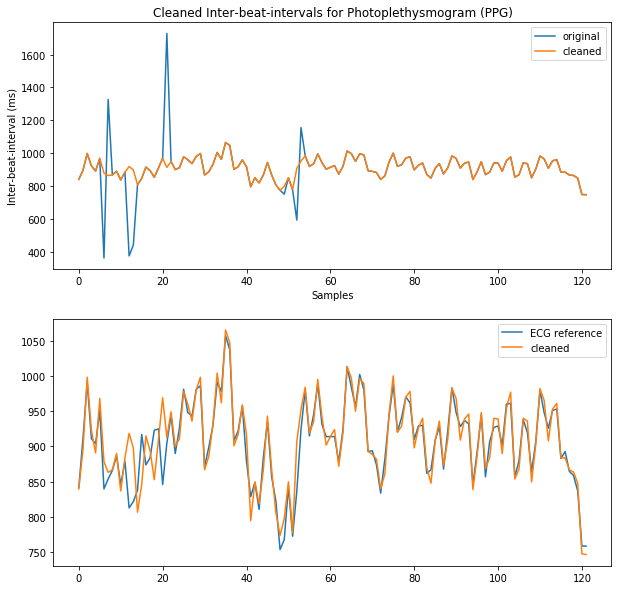

In [ ]:
#### Selected ARMA model

p = 0
q = 11

# BIP-ARMA parameter estimation and data cleaning

flipped_sig = ibi_ppg[::-1]-np.median(ibi_ppg)

result = rsp.arma_est_bip_tau(flipped_sig,p,q,meth =None) # SLSQP doesn't work well here

ibi_ppg_cl = result['cleaned_signal'][::-1]+np.median(ibi_ppg)

print("""
Selected ARMA model: MA(11)
estimated coefficients: 
""", result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(ibi_ppg,label='original')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Cleaned Inter-beat-intervals for Photoplethysmogram (PPG)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(ibi_ecg,label='ECG reference')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.legend()
plt.show()

# 06 Spectrum Estimation

## ARMA(4,3) by Moses et al with 2 percent additive outliers

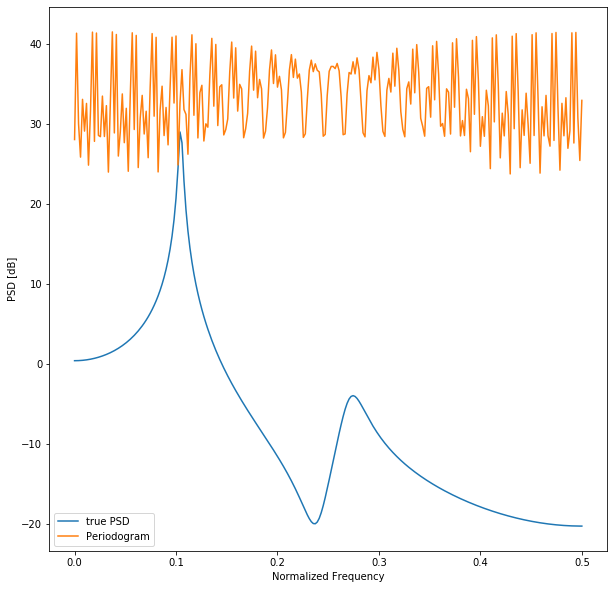

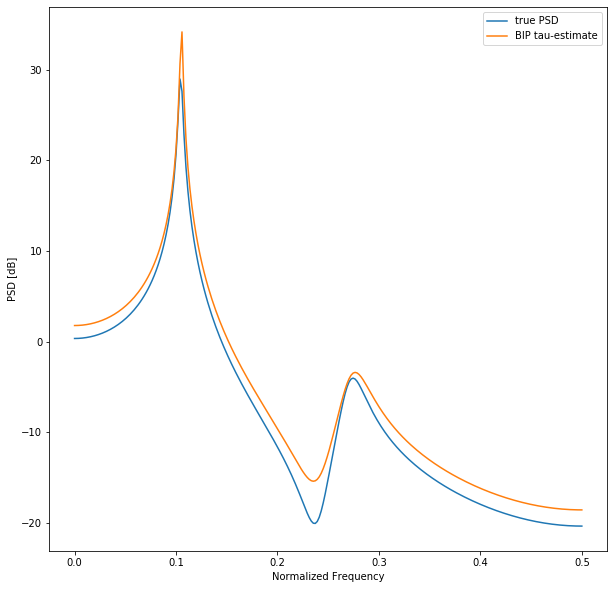

In [ ]:
import numpy as np
import robustsp as rsp
import scipy.signal as sps
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']=[10,10]

np.random.seed(0)

# Generate data
N = 512
a = np.array([1, -1.316, 1.4401, -1.0919, 0.83527])

b_0 = 0.13137
b = np.array([0.13137, 0.023543, 0.10775, 0.03516])/b_0

p = 4
q = 3

w = np.linspace(0,np.pi,int(N/2)) 
s = np.exp(1j*w) 
H = np.polyval(b,s) / np.polyval(a,s)  

z = np.random.randn(N)
y = sps.lfilter(b,a,z)
x = np.array(y)

for jj in range(49,N,51):
    # 2 percent additive outliers
    y[jj] += 1000*np.random.randn(1)

# Periodogram estimate
Pxx = np.abs(np.fft.fft(y))**2

# BIP Tau ARMA estimate
PxxdB_tau, Pxx_tau, w, sigma_hat = rsp.spec_arma_est_bip_tau(y,p,q) # optim with lm

# Note: repeated median filter takes a long time, thus omitted here

plt.figure(0)
plt.plot(w/(2*np.pi), 10*np.log10(1/(2*np.pi) * np.abs(H)**2),label='true PSD')
plt.plot(w/(2*np.pi),10*np.log10(1/N/(2*np.pi)*Pxx[:int(N/2)]),label='Periodogram')
plt.xlabel('Normalized Frequency')
plt.ylabel('PSD [dB]')
plt.legend()

plt.figure(1)
plt.plot(w/(2*np.pi), 10*np.log10(1/(2*np.pi) * np.abs(H)**2),label='true PSD')
plt.plot(w/(2*np.pi),PxxdB_tau,label='BIP tau-estimate')
plt.xlabel('Normalized Frequency')
plt.ylabel('PSD [dB]')
_=plt.legend()